<a href="https://colab.research.google.com/github/smbonilla/learningPyTorch/blob/main/03_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [17]:
# Check for GPU
!nvidia-smi

Thu Dec  8 15:40:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    35W /  70W |   1136MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


1.13.0+cu116


## 1. What are 3 areas in industry where computer vision is currently being used?

1. Computer vision is being used in healthcare - computer aided diagnostics
2. Self-driving vehicles - interpret world in which it is driving
3. agriculture - picking out bad produce

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting in machine learning is when a model has trained too long on its training data and the loss between the train and test begin to diverge

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. early stopping - stopping before the loss between training and testing starts to diverge
2. adding noise - add noise to the data 
3. training on more data 

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [19]:
import torch 
from torch import nn

import torchvision 
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

In [20]:
trainData = torchvision.datasets.MNIST(root="data",
                                       train=True,
                                       transform=ToTensor(),
                                       download=True,
                                       target_transform=None)

testData = torchvision.datasets.MNIST(root="data",
                                      train=False,
                                      transform=ToTensor(),
                                      download=True,
                                      target_transform=None)

classNames = trainData.classes
classNames

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

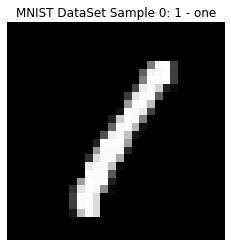

In [21]:
image, label = trainData[3]

import matplotlib.pyplot as plt
plt.imshow(image.squeeze(), cmap="gray");
plt.title(f"MNIST DataSet Sample 0: {classNames[label]}");
plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [112]:
from torch.utils.data import DataLoader

batchSize = 32

trainDataLoader = DataLoader(dataset=trainData,
                             batch_size=batchSize, 
                             shuffle=True)

testDataLoader = DataLoader(dataset=testData,
                            batch_size=batchSize,
                            shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [23]:
class MNISTModel(nn.Module): 
  def __init__(self, inputShape: int, hiddenUnits: int, outputShape: int):
    super().__init__()
    self.convBlock1 = nn.Sequential(
        nn.Conv2d(in_channels=inputShape, 
                  out_channels=hiddenUnits,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hiddenUnits, 
                  out_channels=hiddenUnits,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.convBlock2 = nn.Sequential(
        nn.Conv2d(in_channels=hiddenUnits,
                  out_channels=hiddenUnits,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hiddenUnits,
                  out_channels=hiddenUnits,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.linearBlock = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hiddenUnits*7*7,
                  out_features=outputShape)
    )

  def forward(self,x):
    #print(f"Shape before first Conv Layer: {x.shape}")
    x = self.convBlock1(x)
    #print(f"Shape after first Conv Layer: {x.shape}")
    x = self.convBlock2(x)
    #print(f"Shape after second Conv Layer: {x.shape}")
    x = self.linearBlock(x)
    return x

In [24]:
# instantiate a model and send to device
device = "cuda" if torch.cuda.is_available() else "cpu"

model = MNISTModel(inputShape=1,
                   hiddenUnits=10,
                   outputShape=len(classNames)).to(device)

model

MNISTModel(
  (convBlock1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convBlock2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linearBlock): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [25]:
dummyX = torch.rand(size=([1,28,28]))

model.eval()
with torch.inference_mode():
  dummyY = model(dummyX.to(device).unsqueeze(dim=0))

dummyY.shape

torch.Size([1, 10])

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [26]:
# import accuracy function
import requests 
from pathlib import Path

# download helper functions from learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("Skipping download...")
else:
  print("downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
  f.close()

from helper_functions import accuracy_fn as accuracyFn

Skipping download...


In [27]:
def printTime(start:float,
              end:float,
              device: torch.device=None):
  """
  Print the total time the model took to train
  """
  totalTime = end - start
  print(f"Train time on {device}: {totalTime:.3f} seconds")
  return totalTime 

In [28]:
def evalModel(model: torch.nn.Module,
              dataLoader: torch.utils.data.DataLoader,
              lossFn: torch.nn.Module,
              accuracyFn,
              totalTime: float,
              device: torch.device):
  """
  Returns a dictionary of the model evaluation parameters: loss and accuracy on dataLoader
  """
  loss, acc = 0, 0

  model.eval()

  with torch.inference_mode():
    
    for X, y in tqdm(dataLoader):
      X, y = X.to(device), y.to(device)

      # forward pass logits
      yLogits = model(X)

      # calculate the loss
      loss += lossFn(yLogits,y)
      acc += accuracyFn(y_true=y,
                        y_pred=yLogits.argmax(dim=1))
      
    loss /= len(dataLoader)
    acc /= len(dataLoader)

  return {"modelName": model.__class__.__name__,
          "modelLoss": loss.item(),
          "modelAcc": acc,
          "modelTotalTime": totalTime}

In [29]:
from timeit import default_timer as timer
from tqdm.auto import tqdm
torch.manual_seed(42)

# training on CPU 
device = "cpu"

# instantiate a model for CPU
modelCPU = MNISTModel(inputShape=1,
                   hiddenUnits=10,
                   outputShape=len(classNames)).to(device)

# Create a loss function, optimizer, and accuracy function
lossFn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=modelCPU.parameters(),
                            lr=0.1)

# START timer
startTimer = timer()

# bring model back to cpu 
modelCPU.to(device)
print(f"Model On The ---- {str(next(modelCPU.parameters()).device)} ----")

# number of epochs
epochs = 5

for epoch in tqdm(range(epochs)):

  ##-----TRAINING----- ##

  # model in training mode
  modelCPU.train()

  # initialize loss and accuracy
  loss, acc = 0, 0

  # loop through the batches
  for batch, (X,y) in enumerate(trainDataLoader):

    X, y = X.to(device), y.to(device)

    # 1. Compute the forward pass 
    yLogits = modelCPU(X)

    # 2. Compute the loss
    trainLoss = lossFn(yLogits, y)
    loss += trainLoss

    acc += accuracyFn(y_true=y, 
                      y_pred=yLogits.argmax(dim=1))
    
    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. compute the backward pass
    trainLoss.backward()

    # 5. optimizer step
    optimizer.step()

  loss /= len(trainDataLoader)
  acc /= len(trainDataLoader)

  ##-----TESTING-----#

  modelCPU.eval()
  with torch.inference_mode(): 

    testLoss, testAcc = 0,0

    for X,y in testDataLoader:

      X,y=X.to(device), y.to(device)

      # forward pass
      yTest = modelCPU(X)

      # loss & accuracy
      testLoss += lossFn(yTest, y)
      testAcc += accuracyFn(y_true=y,
                            y_pred=yTest.argmax(dim=1))
      
    testLoss /= len(testDataLoader)
    testAcc /= len(testDataLoader)

  ##-----PRINT OUT WHATS HAPPENING-----##

  print(f"Train loss: {loss:.5f} | Train acc: {acc:.2f}%")
  print(f"Test loss: {testLoss:.5f} | Test acc: {testAcc:.2f}%")

# end timer
endTimer = timer()

totalTimeCPU = printTime(start=startTimer,
                         end=endTimer,
                         device=device)

Model On The ---- cpu ----


  0%|          | 0/5 [00:00<?, ?it/s]

Train loss: 0.26560 | Train acc: 91.33%
Test loss: 0.07676 | Test acc: 97.57%
Train loss: 0.06915 | Train acc: 97.89%
Test loss: 0.04163 | Test acc: 98.62%
Train loss: 0.05270 | Train acc: 98.37%
Test loss: 0.04400 | Test acc: 98.50%
Train loss: 0.04477 | Train acc: 98.55%
Test loss: 0.03381 | Test acc: 98.92%
Train loss: 0.03855 | Train acc: 98.79%
Test loss: 0.03781 | Test acc: 98.77%
Train time on cpu: 209.343 seconds


In [30]:
modelCPUResults = evalModel(model=modelCPU,
                            dataLoader=testDataLoader,
                            lossFn=lossFn,
                            accuracyFn=accuracyFn,
                            totalTime=totalTimeCPU,
                            device=device)

modelCPUResults

  0%|          | 0/313 [00:00<?, ?it/s]

{'modelName': 'MNISTModel',
 'modelLoss': 0.037839651107788086,
 'modelAcc': 98.77196485623003,
 'modelTotalTime': 209.342969058}

In [31]:
# saving CPU model
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME ="modelCPU.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(obj=modelCPU.state_dict(),
           f=MODEL_SAVE_PATH)

Saving Model to: models/modelCPU.pth


In [32]:
# load cpu model and evaluate again
loadedCPUModel = MNISTModel(inputShape=1,
                                   hiddenUnits=10,
                                   outputShape=len(classNames))

# Load in the save state_dict()
loadedCPUModel.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# evaluate model
loadedCPUResults = evalModel(model=loadedCPUModel,
                            dataLoader=testDataLoader,
                            lossFn=lossFn,
                            accuracyFn=accuracyFn,
                            totalTime=totalTimeCPU,
                            device=device)

loadedCPUResults

  0%|          | 0/313 [00:00<?, ?it/s]

{'modelName': 'MNISTModel',
 'modelLoss': 0.03781137615442276,
 'modelAcc': 98.77196485623003,
 'modelTotalTime': 209.342969058}

In [33]:
from timeit import default_timer as timer
from tqdm.auto import tqdm
torch.manual_seed(42)

# training on CPU 
device = "cuda"

# instantiate a model for CPU
modelGPU = MNISTModel(inputShape=1,
                   hiddenUnits=10,
                   outputShape=len(classNames)).to(device)

# Create a loss function, optimizer, and accuracy function
lossFn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=modelGPU.parameters(),
                            lr=0.1)

# START timer
startTimer = timer()

# bring model back to cpu 
modelGPU.to(device)
print(f"Model On The ---- {str(next(modelGPU.parameters()).device)} ----")

# number of epochs
epochs = 5

for epoch in tqdm(range(epochs)):

  ##-----TRAINING----- ##

  # model in training mode
  modelGPU.train()

  # initialize loss and accuracy
  loss, acc = 0, 0

  # loop through the batches
  for batch, (X,y) in enumerate(trainDataLoader):

    X, y = X.to(device), y.to(device)

    # 1. Compute the forward pass 
    yLogits = modelGPU(X)

    # 2. Compute the loss
    trainLoss = lossFn(yLogits, y)
    loss += trainLoss

    acc += accuracyFn(y_true=y, 
                      y_pred=yLogits.argmax(dim=1))
    
    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. compute the backward pass
    trainLoss.backward()

    # 5. optimizer step
    optimizer.step()

  loss /= len(trainDataLoader)
  acc /= len(trainDataLoader)

  ##-----TESTING-----#

  modelGPU.eval()
  with torch.inference_mode(): 

    testLoss, testAcc = 0,0

    for X,y in testDataLoader:

      X,y=X.to(device), y.to(device)

      # forward pass
      yTest = modelGPU(X)

      # loss & accuracy
      testLoss += lossFn(yTest, y)
      testAcc += accuracyFn(y_true=y,
                            y_pred=yTest.argmax(dim=1))
      
    testLoss /= len(testDataLoader)
    testAcc /= len(testDataLoader)

  ##-----PRINT OUT WHATS HAPPENING-----##

  print(f"Train loss: {loss:.5f} | Train acc: {acc:.2f}%")
  print(f"Test loss: {testLoss:.5f} | Test acc: {testAcc:.2f}%")

# end timer
endTimer = timer()

totalTimeGPU = printTime(start=startTimer,
                         end=endTimer,
                         device=device)

Model On The ---- cuda:0 ----


  0%|          | 0/5 [00:00<?, ?it/s]

Train loss: 0.26586 | Train acc: 91.28%
Test loss: 0.08150 | Test acc: 97.27%
Train loss: 0.07010 | Train acc: 97.85%
Test loss: 0.04009 | Test acc: 98.68%
Train loss: 0.05347 | Train acc: 98.32%
Test loss: 0.04758 | Test acc: 98.36%
Train loss: 0.04485 | Train acc: 98.59%
Test loss: 0.03456 | Test acc: 98.87%
Train loss: 0.03902 | Train acc: 98.78%
Test loss: 0.03590 | Test acc: 98.71%
Train time on cuda: 55.386 seconds


In [94]:
modelGPUResults = evalModel(model=modelGPU,
                            dataLoader=testDataLoader,
                            lossFn=lossFn,
                            accuracyFn=accuracyFn,
                            totalTime=totalTimeCPU,
                            device=device)

modelGPUResults

  0%|          | 0/313 [00:00<?, ?it/s]

{'modelName': 'MNISTModel',
 'modelLoss': 0.035902123898267746,
 'modelAcc': 98.7120607028754,
 'modelTotalTime': 55.38558664200002}

In [36]:
modelCPUResults

{'modelName': 'MNISTModel',
 'modelLoss': 0.037839651107788086,
 'modelAcc': 98.77196485623003,
 'modelTotalTime': 209.342969058}

In [37]:
# save gpu model
from pathlib import Path

MODEL_NAME = "modelGPU.pth"
MODEL_SAVE_NAME = MODEL_PATH / MODEL_NAME

print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(obj=modelGPU.state_dict(),
           f=MODEL_SAVE_NAME)

Saving Model to: models/modelCPU.pth


In [38]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [45]:

path = f"/content/gdrive/MyDrive/models/{MODEL_NAME}" 
torch.save(modelGPU.state_dict(), path)

path = f"/content/gdrive/MyDrive/models/modelCPU.pth" 
torch.save(modelCPU.state_dict(), path)

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [75]:
# visualizing random subset of data and predictions
def plotRandomPredictions(testSamples: list,
                          testLabels: list,
                          classNames: list,
                          predClasses: torch.tensor,
                          predMax: torch.tensor):
  
  fig = plt.figure(figsize=(9,10))
  rows,cols = 3,3

  for i in range(1,rows*cols+1):

    #fig.add_subplot(rows,cols,i+1)
    fig.add_subplot(rows,cols,i);
    plt.imshow(testSamples[i-1].squeeze(),cmap="gray")
    titleText =f"Actual Label: {classNames[testLabels[i-1]]} \n Predicted Label: {classNames[predClasses[i-1]]} \n Prediction Probability: {predMax[i-1].item()*100:.2f}"
    if classNames[predClasses[i-1]] == classNames[testLabels[i-1]]:
      plt.title(titleText,fontsize=10,c="g")
    else:
      plt.title(titleText, fontsize=10,c="r")
    plt.axis(False)

def makePredictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
  predProbs = []

  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dim and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # forward pass (model outputs raw logits)
      predLogit = model(sample)

      # prediction probability 
      predProb = torch.softmax(predLogit.squeeze(),dim=0)

      # get predProbs off the GPU for further calculations
      predProbs.append(predProb.cpu())

  # stack the predProbs to turn list into a tensor
  return torch.stack(predProbs)

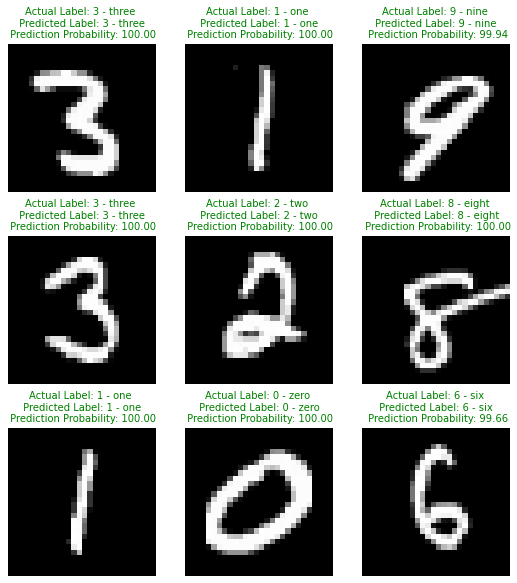

In [98]:
import random

testSamples = []
testLabels = []

for sample, label in random.sample(list(testData), k=9):
  testSamples.append(sample)
  testLabels.append(label)

predictionsGPU = makePredictions(model=modelGPU,
                                 data=testSamples,
                                 device="cpu")

predClasses = predictionsGPU.argmax(dim=1)

plotRandomPredictions(testSamples=testSamples,
                      testLabels=testLabels,
                      classNames=classNames,
                      predClasses=predClasses,
                      predMax=predictionsGPU.max(dim=1).values)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [110]:

# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
     

mlxtend version: 0.21.0


In [111]:

# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.21.0


In [113]:

# Make predictions across all test data
from tqdm.auto import tqdm
modelGPU.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(testDataLoader)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = modelGPU(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds) 

0it [00:00, ?it/s]

10000

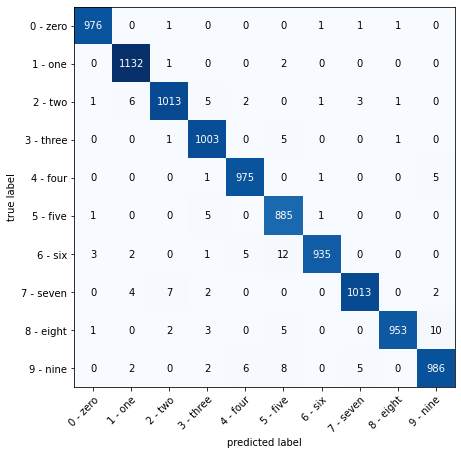

In [116]:

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix 
confmat = ConfusionMatrix(num_classes=len(classNames),task="multiclass")
confmat_tensor = confmat(preds=y_preds,
                         target=testData.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=classNames,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?